<a href="https://colab.research.google.com/github/HarikaSuryam/HomeAssignments/blob/main/Assignment2_HarikaVinjamuri_700769273.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Home Assignment 2**

Name - Harika Vinjamuri

Student ID - 700769273


In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Question 1 - Convolution Operations with Different Parameters
# Performing convolutional operation

# Given input and kernal matrix as below
input_matrix = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15],[16,17,18,19,20],[21,22,23,24,25]],dtype = np.float32)
input_tensor = input_matrix.reshape(1, 5, 5, 1)

kernel_matrix = np.array([[0,1,0],[1,-4,1],[0,1,0]])
kernel_tensor = kernel_matrix.reshape(3, 3, 1, 1)

# Stride = 1, Padding = ‘VALID’
output1 = tf.nn.conv2d(input = input_tensor , filters = kernel_tensor , strides = 1, padding = 'VALID')
print("OUTPUT 1: STRIDE=1,PADDING='VALID'")
print(output1.numpy().squeeze())

# Stride = 1, Padding = ‘SAME’
output2 = tf.nn.conv2d(input = input_tensor , filters = kernel_tensor , strides = 1, padding = 'SAME')
print("OUTPUT 2: STRIDE=1,PADDING='SAME'")
print(output2.numpy().squeeze())

#	Stride = 2, Padding = ‘VALID’
output3 = tf.nn.conv2d(input = input_tensor , filters = kernel_tensor , strides = 2, padding = 'VALID')
print("OUTPUT 3: STRIDE=2,PADDING='VALID'")
print(output3.numpy().squeeze())

#	Stride = 2, Padding = ‘SAME’
output4 = tf.nn.conv2d(input = input_tensor , filters = kernel_tensor , strides = 2, padding = 'SAME')
print("OUTPUT 4: STRIDE=2,PADDING='SAME'")
print(output4.numpy().squeeze())

OUTPUT 1: STRIDE=1,PADDING='VALID'
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
OUTPUT 2: STRIDE=1,PADDING='SAME'
[[  4.   3.   2.   1.  -6.]
 [ -5.   0.   0.   0. -11.]
 [-10.   0.   0.   0. -16.]
 [-15.   0.   0.   0. -21.]
 [-46. -27. -28. -29. -56.]]
OUTPUT 3: STRIDE=2,PADDING='VALID'
[[0. 0.]
 [0. 0.]]
OUTPUT 4: STRIDE=2,PADDING='SAME'
[[  4.   2.  -6.]
 [-10.   0. -16.]
 [-46. -28. -56.]]


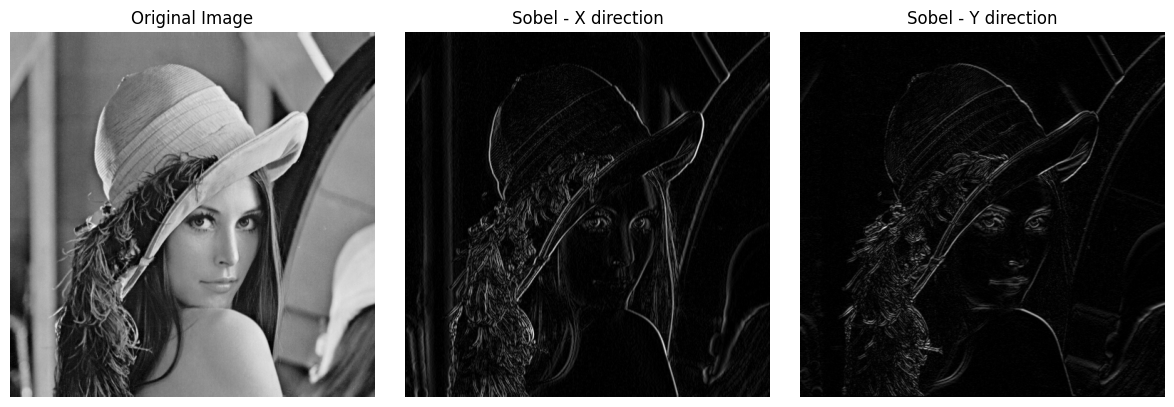

In [6]:
# Question 2 - CNN Feature Extraction with Filters and Pooling
# Task 1 :- Implement Edge Detection Using Convolution

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import urllib.request

# Load image from URL
url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)

# Define Sobel filters manually
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# Apply convolution using SciPy
edges_x = convolve2d(image, sobel_x, mode='same', boundary='symm')
edges_y = convolve2d(image, sobel_y, mode='same', boundary='symm')


# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.axis('off')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Sobel - X direction")
plt.axis('off')
plt.imshow(np.abs(edges_x), cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Sobel - Y direction")
plt.axis('off')
plt.imshow(np.abs(edges_y), cmap='gray')

plt.tight_layout()
plt.show()


In [19]:
import numpy as np
import tensorflow as tf

# Step 1: Create a random 4x4 matrix (input image) and convert it to float32
input_matrix = np.random.randint(0, 10, (1, 4, 4, 1)).astype(np.float32)  # Shape: (batch, height, width, channels)

print("Original 4x4 Matrix:")
print(input_matrix[0, :, :, 0])

# Apply 2x2 Max Pooling
max_pool = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid')
max_pooled_output = max_pool(input_matrix)

print("\n2x2 Max Pooled Matrix:")
print(max_pooled_output.numpy()[0, :, :, 0])

# Apply 2x2 Average Pooling
avg_pool = AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid')
avg_pooled_output = avg_pool(input_matrix)

print("\n2x2 Average Pooled Matrix:")
print(avg_pooled_output.numpy()[0, :, :, 0])


Original 4x4 Matrix:
[[4. 8. 4. 7.]
 [1. 3. 7. 3.]
 [8. 8. 3. 1.]
 [8. 0. 0. 0.]]

2x2 Max Pooled Matrix:
[[8. 7.]
 [8. 3.]]

2x2 Average Pooled Matrix:
[[4.   5.25]
 [6.   1.  ]]


Original Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Min-Max Normalized Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667

Z-score Standardized Dataset:
   sepal l

<Figure size 1200x500 with 0 Axes>

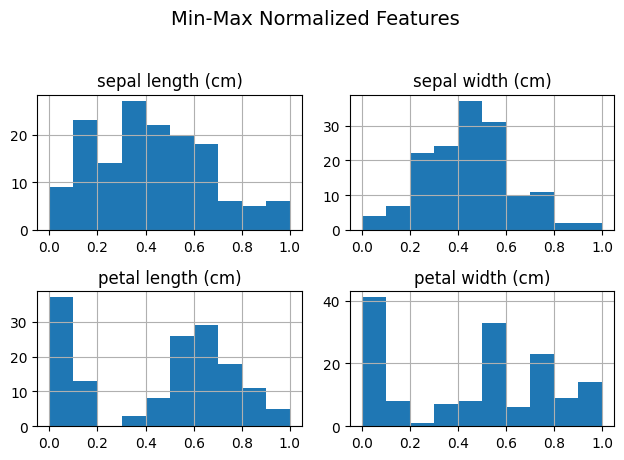

<Figure size 1200x500 with 0 Axes>

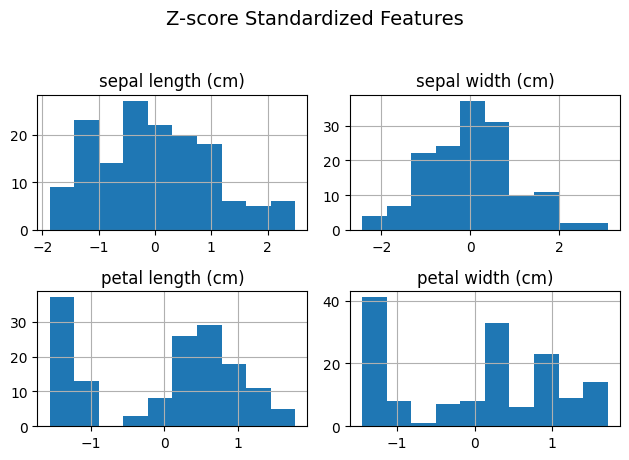

Accuracy with Original Data: 1.0000
Accuracy with Min-Max Normalized Data: 0.9737
Accuracy with Z-score Standardized Data: 1.0000

Recommendation:

- Normalization (Min-Max Scaling) is used when the data needs to be scaled to a specific range (e.g., [0, 1]) or when using algorithms that assume bounded inputs (e.g., neural networks with sigmoid/tanh activations).
- Standardization (Z-score) is used when the data is normally distributed or for models that assume Gaussian input (e.g., SVM, logistic regression).
- For deep learning, normalization is generally preferred with activations like sigmoid/relu, while standardization is often used for features feeding into algorithms like logistic regression, SVM, or PCA.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Loading Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print("Original Dataset:")
print(X.head())

# Applying Min-Max Normalization
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)

X_norm_df = pd.DataFrame(X_normalized, columns=X.columns)
print("\nMin-Max Normalized Dataset:")
print(X_norm_df.head())

# Applying Z-score Standardization
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X)

X_std_df = pd.DataFrame(X_standardized, columns=X.columns)
print("\nZ-score Standardized Dataset:")
print(X_std_df.head())

# Visualize distributions
plt.figure(figsize=(12, 5))
X_norm_df.hist(bins=10, layout=(2, 2), sharex=False, sharey=False)
plt.suptitle('Min-Max Normalized Features', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.figure(figsize=(12, 5))
X_std_df.hist(bins=10, layout=(2, 2), sharex=False, sharey=False)
plt.suptitle('Z-score Standardized Features', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Training Logistic Regression on raw, normalized, and standardized data
def train_and_evaluate(X_data, y_data, desc):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, random_state=42)
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {desc}: {acc:.4f}")

train_and_evaluate(X, y, "Original Data")
train_and_evaluate(X_normalized, y, "Min-Max Normalized Data")
train_and_evaluate(X_standardized, y, "Z-score Standardized Data")

# Preferable use of Normalization vs. Standardization
print("\nRecommendation:")
print("""
- Normalization (Min-Max Scaling) is used when the data needs to be scaled to a specific range (e.g., [0, 1]) or when using algorithms that assume bounded inputs (e.g., neural networks with sigmoid/tanh activations).
- Standardization (Z-score) is used when the data is normally distributed or for models that assume Gaussian input (e.g., SVM, logistic regression).
- For deep learning, normalization is generally preferred with activations like sigmoid/relu, while standardization is often used for features feeding into algorithms like logistic regression, SVM, or PCA.
""")
